# Chapter 4b: Gradient descent & back-propagation for 1 neuron

We will now build a logistic regression model with a neural network mindset. We already learned about the logistic regression in chapter 2d. The exercises of section 1 will correspond to the tutorial from Andrew Ng's Deep Learning course.

We will then apply our model to the _Ionosphere dataset_ taken from Sigillito et al. (1989) which is a simple example of relatively complex pattern in radar data.

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## 1. Logistic regression with ANN mindset

### 1.1. Activation function definition

We will use as activation function for the one-neuron model the sigmoid, which is equivalent to the logistic regression: $sigmoid( w^T x + b) = \frac{1}{1 + e^{-(w^T x + b)}}$

**EXERCISE 1:** Implement `sigmoid()` (use `np.exp()`).

In [60]:
def sigmoid(z):
    """
    Compute the sigmoid of z

    Arguments:
    z -- A scalar or numpy array of any size.

    Return:
    s -- sigmoid(z)
    """
    s=1/(1+np.exp(-z))
    #YOUR CODE HERE (≈ 1 line of code)
    
    
    return s

### 1.2. Parameter initialization

**EXERCISE 2:** Implement parameter initialization in the cell below. You have to initialize $w$ as a vector of zeros (use `np.zeros()`).

In [92]:
# GRADED FUNCTION: initialize_with_zeros

def initialize_with_zeros(dim):
    """
    This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.
    
    Argument:
    dim -- size of the w vector we want (or number of parameters in this case)
    
    Returns:
    w -- initialized vector of shape (dim, 1)
    b -- initialized scalar (corresponds to the bias)
    """
    
    #YOUR CODE HERE (≈ 2 lines of code)
    w = np.zeros((dim,1)) #features
    b = 0
        
    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))
    
    return w, b

In [93]:
dim = 2
w, b = initialize_with_zeros(dim)
print ("w = " + str(w))
print ("b = " + str(b))

w = [[0.]
 [0.]]
b = 0


**Expected Output**: 

<table style="width:15%">
    <tr>
        <td>  ** w **  </td>
        <td> [[ 0.]
 [ 0.]] </td>
    </tr>
    <tr>
        <td>  ** b **  </td>
        <td> 0 </td>
    </tr>
</table>

### 1.3. Forward & backward propagation

Now that your parameters are initialized, you can do the "forward" and "backward" propagation steps for learning the parameters.

**EXERCISE 3:** Implement a function `propagate()` that computes the cost function and its gradient.

**Hints**:

Forward Propagation:
- You get $X$
- You compute $A = \sigma(w^T X + b) = (a^{(1)}, a^{(2)}, ..., a^{(m-1)}, a^{(m)})$
- You calculate the cost function (negative log-likelihood cost for logistic regression): $J = -\frac{1}{m}\sum_{i=1}^{m}y^{(i)}\log(a^{(i)})+(1-y^{(i)})\log(1-a^{(i)})$

Here are the two formulas you will be using to compute the gradient of the cost function (for back-propagation): 

$$ \frac{\partial J}{\partial w} = \frac{1}{m}X(A-Y)^T\tag{7}$$
$$ \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (a^{(i)}-y^{(i)})\tag{8}$$

In [135]:
# GRADED FUNCTION: propagate

def propagate(w, b, X, Y):
    """
    Implement the cost function and its gradient for the propagation explained above

    Arguments:
    w -- weights, a numpy array of size (dim, 1)
    b -- bias, a scalar
    X -- data of size (dim, number of examples)
    Y -- true "label" vector of size (1, number of examples)

    Return:
    cost -- negative log-likelihood cost for logistic regression
    dw -- gradient of the loss with respect to w, thus same shape as w
    db -- gradient of the loss with respect to b, thus same shape as b
    
    Tips:
    - Write your code step by step for the propagation. Use w.T for transpose, np.log(), np.dot()
    """
    
    m = X.shape[1] #samples
    
    w=np.matrix(w)
    X=np.matrix(X)
    Y=np.matrix(Y)
    # FORWARD PROPAGATION (FROM X TO COST)
    #YOUR CODE HERE (≈ 2 lines of code)
    
    A = sigmoid(w.T*X+b)
    A = A.reshape(Y.shape)
    cost = -(1/m)*np.sum(np.multiply(Y,np.log(A))+np.multiply(1-Y,np.log(1-A)))
    
    # BACKWARD PROPAGATION (TO FIND GRAD)
    #YOUR CODE HERE (≈ 2 lines of code)
    dw = np.multiply(1/m,X*(A-Y).T)
    db = (1/m)*np.sum(A-Y)
    
    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    #assert(cost.shape == ())
    
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

In [133]:
X = np.matrix(X)
w = np.matrix(w)
A  = sigmoid(w.T*X+b)

In [122]:
X.shape,X

((2, 3),
 array([[ 1. ,  2. , -1. ],
        [ 3. ,  4. , -3.2]]))

In [136]:
w, b, X, Y = np.array([[1.],[2.]]), 2., np.array([[1.,2.,-1.],[3.,4.,-3.2]]), np.array([[1,0,1]])
grads, cost = propagate(w, b, X, Y)
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))

dw = [[0.99845601]
 [2.39507239]]
db = 0.001455578136784208
cost = 5.801545319394553


**Expected Output**:

<table style="width:50%">
    <tr>
        <td>  ** dw **  </td>
      <td> [[ 0.99845601]
     [ 2.39507239]]</td>
    </tr>
    <tr>
        <td>  ** db **  </td>
        <td> 0.00145557813678 </td>
    </tr>
    <tr>
        <td>  ** cost **  </td>
        <td> 5.801545319394553 </td>
    </tr>

</table>

### 1.4. Optimization (Gradient descent)

- You have initialized your parameters.
- You are also able to compute a cost function and its gradient.
- Now, you want to update the parameters using gradient descent.

**EXERCISE 4:** Write down the optimization function. The goal is to learn $w$ and $b$ by minimizing the cost function $J$. For a parameter $\theta$, the update rule is $ \theta = \theta - \alpha \text{ } d\theta$, where $\alpha$ is the learning rate.

In [96]:
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    """
    This function optimizes w and b by running a gradient descent algorithm
    
    Arguments:
    w -- weights, a numpy array of size (dim, 1)
    b -- bias, a scalar
    X -- data of shape (dim, number of examples)
    Y -- true "label" vector of shape (1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    
    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    
    Tips:
    You basically need to write down two steps and iterate through them:
        1) Calculate the cost and the gradient for the current parameters. Use propagate().
        2) Update the parameters using gradient descent rule for w and b.
    """
    
    costs = []
    
    for i in range(num_iterations):
        
        # Cost and gradient calculation
        #YOUR CODE HERE (1 line of code)
        
        grads, cost = propagate(w, b, X, Y)
        
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        
        # update rule
        #YOUR CODE HERE (≈ 2 lines of code)
        w = w-learning_rate*dw
        b = b-learning_rate*db
        
        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
        
        # Print the cost every 100 training iterations
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

In [97]:
params, grads, costs = optimize(w, b, X, Y, num_iterations= 100, learning_rate = 0.009, print_cost = True)

print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))

Cost after iteration 0: 5.801545
w = [[0.19033591]
 [0.12259159]]
b = 1.9253598300845747
dw = [[0.67752042]
 [1.41625495]]
db = 0.21919450454067652


**Expected Output**: 

<table style="width:40%">
    <tr>
       <td> **w** </td>
       <td>[[ 0.19033591] [ 0.12259159]] </td>
    </tr>
    <tr>
       <td> **b** </td>
       <td> 1.92535983008 </td>
    </tr>
    <tr>
       <td> **dw** </td>
       <td> [[ 0.67752042] [ 1.41625495]] </td>
    </tr>
    <tr>
       <td> **db** </td>
       <td> 0.219194504541 </td>
    </tr>
</table>


### 1.5. Class prediction

**EXERCISE 5:** The previous function will output the learned $w$ and $b$. We are able to use $w$ and $b$ to predict the labels for a dataset $X$. Implement the `predict()` function. There are two steps to computing predictions:

1. Calculate $\hat{Y} = A = \sigma(w^T X + b)$

2. Convert the entries of $A$ into 0 if activation <= 0.5 or 1 if activation > 0.5; store the predictions in a vector `Y_prediction`. If you wish, you can use an `if`/`else` statement in a `for` loop (though there is also a way to vectorize this). 

In [104]:
def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    
    Arguments:
    w -- weights, a numpy array of size (dim, 1)
    b -- bias, a scalar
    X -- data of size (dim, number of examples)
    
    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''
    
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)
    
    # Compute vector "A" predicting the logistic regression probabilities
    #YOUR CODE HERE (≈ 1 line of code)
    A = sigmoid(np.matrix(w).T*np.matrix(X)+b)
    
    for i in range(A.shape[1]):
        
        # Convert probabilities A[0,i] to actual predictions [0,i]
        #YOUR CODE HERE (≈ 4 lines of code)
        if A[0,i]>= .5:
            Y_prediction[0,i]=1.0

            
            
    assert(Y_prediction.shape == (1, m))
    
    return Y_prediction

In [105]:
w = np.array([[0.1124579],[0.23106775]])
b = -0.3
X = np.array([[1.,-1.1,-3.2],[1.2,2.,0.1]])
print ("predictions = " + str(predict(w, b, X)))

predictions = [[1. 1. 0.]]


**Expected Output**: 

<table style="width:30%">
    <tr>
         <td>
             **predictions**
         </td>
          <td>
            [[ 1.  1.  0.]]
         </td>  
   </tr>

</table>

### 1.6. Merge all functions into a model

You will now see how the overall model is structured by putting together all the building blocks (functions implemented in the previous parts) together, in the right order.

**EXERCISE 6:** Implement the model function. Use the following notation:
    - `Y_prediction_test` for your predictions on the test set
    - `Y_prediction_train` for your predictions on the train set
    - `w`, `costs`, `grads` for the outputs of `optimize()`

We will apply the model to the Ionopshere dataset in the next section!

In [103]:
X_train.shape

(280, 34)

In [156]:
def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False):
    """
    Builds the logistic regression model by calling the function you've implemented previously
    
    Arguments:
    X_train -- training set represented by a numpy array of shape (dim, m_train)
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_test -- test set represented by a numpy array of shape (dim, m_test)
    Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations
    
    Returns:
    d -- dictionary containing information about the model.
    """
    dim = X_train.shape[1]#features
    m_train = X_train.shape[0]#samples
    m_test = X_test.shape[0]
    # initialize parameters with zeros
    #YOUR CODE HERE (≈ 1 line of code)
    w,b = initialize_with_zeros(dim)

    # Gradient descent
    #YOUR CODE HERE (≈ 1 line of code)
    X_train = X_train.reshape((dim,m_train))
    X_test = X_test.reshape((dim,m_test))
    Y_train = Y_train.reshape(1,m_train)
    Y_test = y_test.reshape(1,m_test)
    
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost = False)
    
    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]
    
    # Predict test/train set examples
    #YOUR CODE HERE(≈ 2 lines of code)
#    Y_prediction_test = ?
#    Y_prediction_train = ?
    
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w,b, X_train)
    

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

## 2. Application to the Ionosphere dataset

We will now consider some radar data collected by a system in Goose Bay, Labrador.  This system consists of a phased array of 16 high-frequency antennas with a total transmitted power on the order of 6.4 kilowatts.  See the paper by Sigillito et al. (1989) for more details.  The targets were free electrons in the ionosphere. "Good" (`g`) radar returns are those showing evidence of some type of structure in the ionosphere.  "Bad" (`b`) returns are those that do not; their signals pass through the ionosphere.

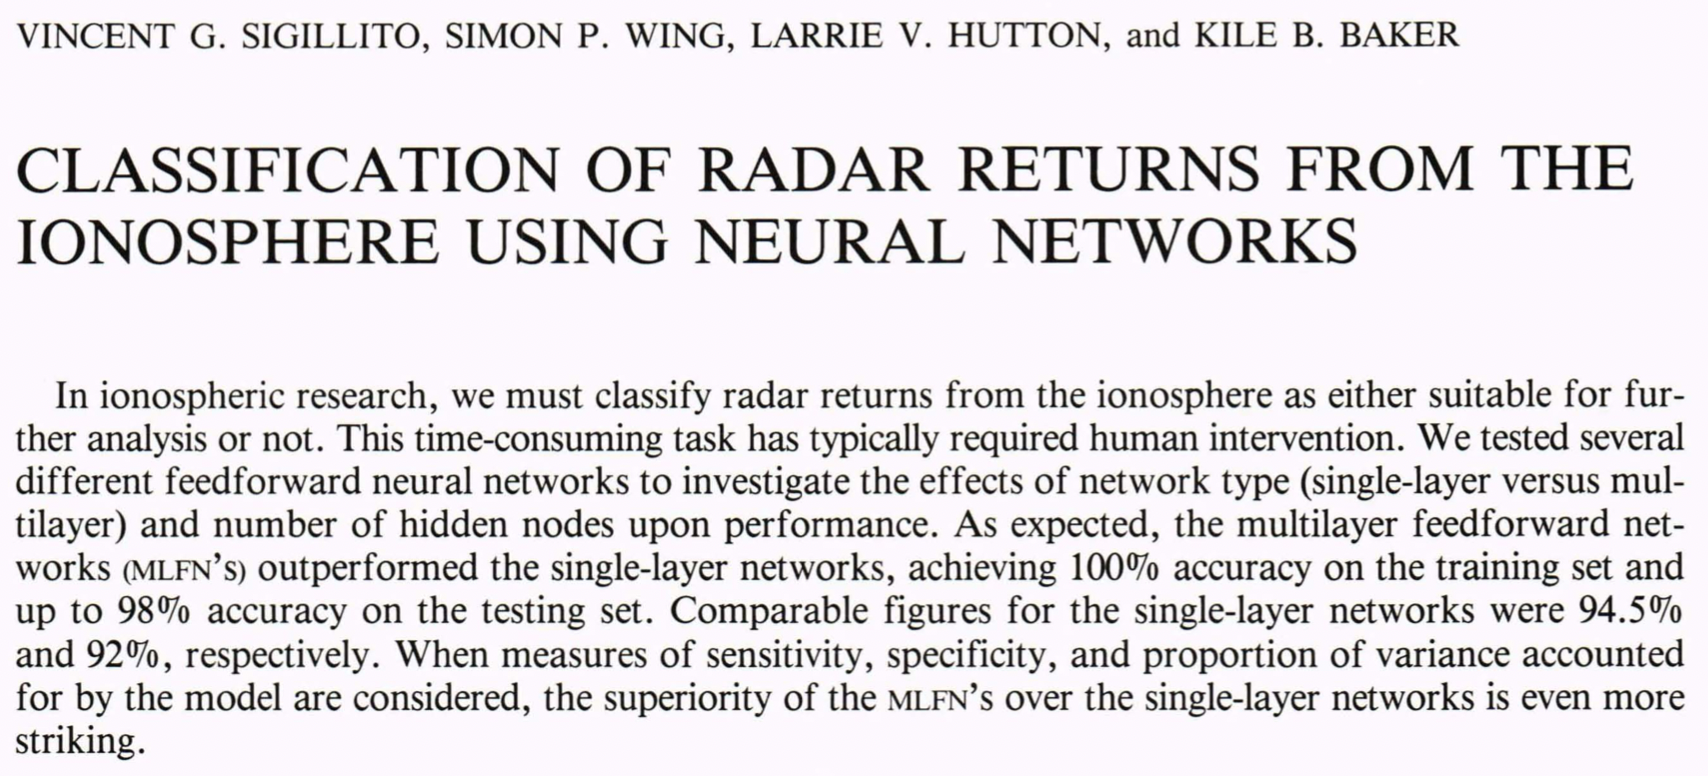

Received signals were processed using an autocorrelation function whose arguments are the time of a pulse and the pulse number.  There were 17 pulse numbers for the Goose Bay system. Instances in this databse are described by 2 attributes per pulse number, corresponding to the complex values returned by the function resulting from the complex electromagnetic signal.

* Number of Instances: 351
* Number of Attributes: 34 plus the class attribute

### 2.1. Dataset

In [148]:
# import data
data_df = pd.read_csv('D:/MLGeo-Data/ionosphere_data.txt', header = None)

data_df.rename(columns={34: 'label'}, inplace = True)
data_df['label'].astype('category')
data_df['label'].replace({'g': 1, 'b': 0}, inplace = True)

y = data_df['label'].values
data_df.drop('label', inplace = True, axis = 1)
X = data_df.values

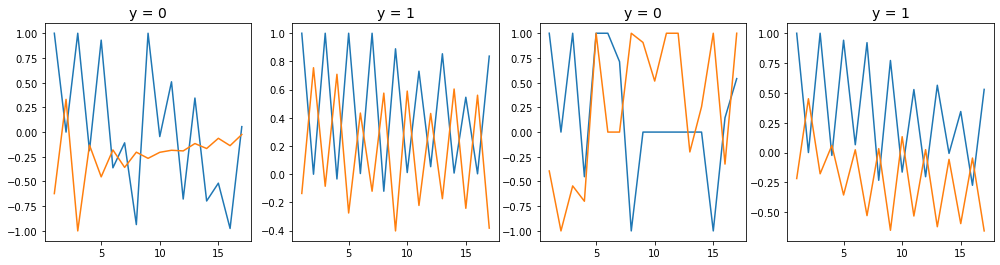

In [78]:
# plot data
Xi = np.arange(1, 17+1, 1)

fig, ax = plt.subplots(1, 4, figsize=(17, 4))
for axi, i in zip(ax, range(1, 5)):
    axi.plot(Xi, X[i, 0:16+1])
    axi.plot(Xi, X[i, 17:33+1])
    axi.set_title('y = {0}'.format(y[i]), size = 14)

### 2.2. Model training & prediction

**EXERCISE 7:** Split the data into a training set and a test set. Let us all use the same data split for score comparison purposes by setting `random_state = 7`.

In [82]:
from sklearn.model_selection import train_test_split

In [149]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=7,test_size = .2)
X_train.shape,X_test.shape

((280, 34), (71, 34))

In [150]:
#YOUR CODE HERE

m_train = np.shape(X_train)[0]
m_test = np.shape(X_test)[0]

print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))

Number of training examples: m_train = 280
Number of testing examples: m_test = 71


**EXERCISE 8:** Run `model()`. Be careful, the data input must first be reformatted using `reshape()`.

In [174]:
result=model(X_train, y_train, X_test, y_test, num_iterations = 2000, learning_rate = 0.01, print_cost = False)

train accuracy: 71.07142857142857 %
test accuracy: 53.521126760563384 %


In [16]:
#YOUR CODE HERE


Cost after iteration 0: 0.693147
Cost after iteration 100: 0.265337
Cost after iteration 200: 0.236426
Cost after iteration 300: 0.222155
Cost after iteration 400: 0.213023
Cost after iteration 500: 0.206429
Cost after iteration 600: 0.201309
Cost after iteration 700: 0.197133
Cost after iteration 800: 0.193610
Cost after iteration 900: 0.190561
Cost after iteration 1000: 0.187873
Cost after iteration 1100: 0.185468
Cost after iteration 1200: 0.183293
Cost after iteration 1300: 0.181308
Cost after iteration 1400: 0.179483
Cost after iteration 1500: 0.177796
Cost after iteration 1600: 0.176227
Cost after iteration 1700: 0.174761
Cost after iteration 1800: 0.173388
Cost after iteration 1900: 0.172097
train accuracy: 94.28571428571429 %
test accuracy: 91.54929577464789 %


A reasonable model performance would be ~90%. In chapter 4c, we will extend the codes to the ANN model case. We should then see the performance improve.

### 2.3. Plotting

To conclude, let us plot the learning curve. You can see the cost decreasing. It shows that the parameters are being learned.

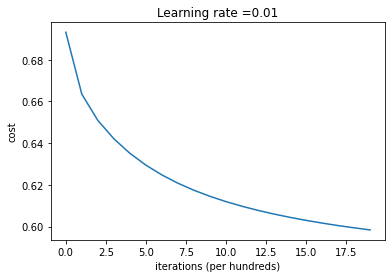

In [175]:
# Plot learning curve (with costs)
costs = np.squeeze(result['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(result["learning_rate"]))
plt.show()

**EXERCISE 9:** Define a list of potential learning rates to investigate the best option. What is the best learning rate you can obtain? What are the matching accuracies for the training and test sets?

_YOUR ANSWER HERE_

learning rate is: 1
train accuracy: 94.28571428571429 %
test accuracy: 91.54929577464789 %

-------------------------------------------------------

learning rate is: 0.5
train accuracy: 92.85714285714286 %
test accuracy: 88.73239436619718 %

-------------------------------------------------------

learning rate is: 0.01
train accuracy: 87.14285714285714 %
test accuracy: 83.09859154929578 %

-------------------------------------------------------



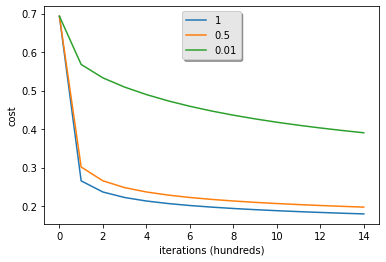

In [18]:
#YOUR CODE HERE
learning_rates = [1,.5,.01]

models = {}
for i in learning_rates:
    print ("learning rate is: " + str(i))
    models[str(i)] = model(X_train, y_train, X_test, y_test, num_iterations = 1500, learning_rate = i, print_cost = False)
    print ('\n' + "-------------------------------------------------------" + '\n')

for i in learning_rates:
    plt.plot(np.squeeze(models[str(i)]["costs"]), label= str(models[str(i)]["learning_rate"]))

plt.ylabel('cost')
plt.xlabel('iterations (hundreds)')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

## References

* Sigillito et al. (1989), Classification of radar returns from the ionosphere using neural networks, Johns Hopkins APL Technical Digest, 10, 262-266